# HR Analytics - Employee Attrition

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Data Loading and Cleaning

In [2]:
data=pd.read_csv("D:\Study Material\employe.csv")
data

<>:1: SyntaxWarning: invalid escape sequence '\S'
<>:1: SyntaxWarning: invalid escape sequence '\S'
C:\Users\netus\AppData\Local\Temp\ipykernel_13832\1186337846.py:1: SyntaxWarning: invalid escape sequence '\S'
  data=pd.read_csv("D:\Study Material\employe.csv")


,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.37,0.52,2,159,3,0,1,0,sales,low
4,0.41,0.50,2,153,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.11,0.85,7,275,4,0,1,0,support,medium
14995,0.99,0.83,4,274,2,0,0,0,sales,low
14996,0.72,0.72,4,175,4,0,0,0,technical,low
14997,0.24,0.91,5,177,5,0,0,0,sales,low


In [3]:
print(data.info())
data.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfactoryLevel      14999 non-null  float64
 1   lastEvaluation         14999 non-null  float64
 2   numberOfProjects       14999 non-null  int64  
 3   avgMonthlyHours        14999 non-null  int64  
 4   timeSpent.company      14999 non-null  int64  
 5   workAccident           14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotionInLast5years  14999 non-null  int64  
 8   dept                   14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB
None


,count,mean,std,min,25%,50%,75%,max
satisfactoryLevel,14999.0,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0
lastEvaluation,14999.0,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0
numberOfProjects,14999.0,3.803054,1.232592,2.00,3.00,4.00,5.00,7.0
avgMonthlyHours,14999.0,201.050337,49.943099,96.00,156.00,200.00,245.00,310.0
timeSpent.company,14999.0,3.498233,1.460136,2.00,3.00,3.00,4.00,10.0
workAccident,14999.0,0.144610,0.351719,0.00,0.00,0.00,0.00,1.0
left,14999.0,0.238083,0.425924,0.00,0.00,0.00,0.00,1.0
promotionInLast5years,14999.0,0.021268,0.144281,0.00,0.00,0.00,0.00,1.0


There are no null values in any column of our dataset.

In [4]:
num_columns = data.select_dtypes(include=['int64']).columns.tolist()

new_num_columns = [col for col in num_columns if data[col].nunique() > 2]

print( new_num_columns)


['numberOfProjects', 'avgMonthlyHours', 'timeSpent.company']


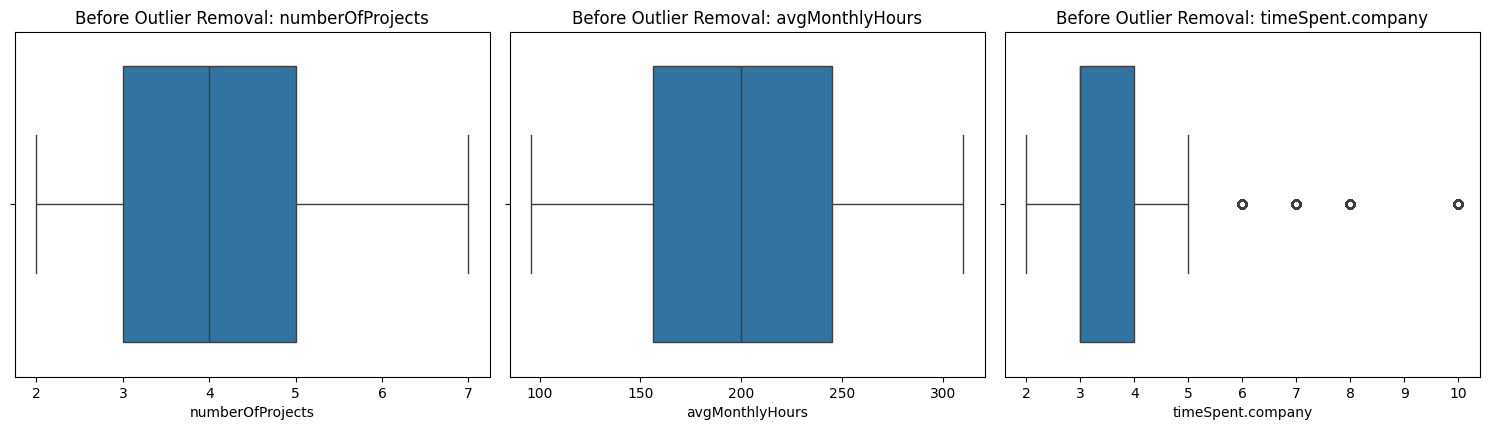

In [5]:
plt.figure(figsize=(15, 8))
for i, col in enumerate(new_num_columns):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x=data[col])
    plt.title(f"Before Outlier Removal: {col}")
plt.tight_layout()
plt.show()

In [6]:
# Removing outliers
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
for col in new_num_columns:
    data = remove_outliers_iqr(data, col)
    

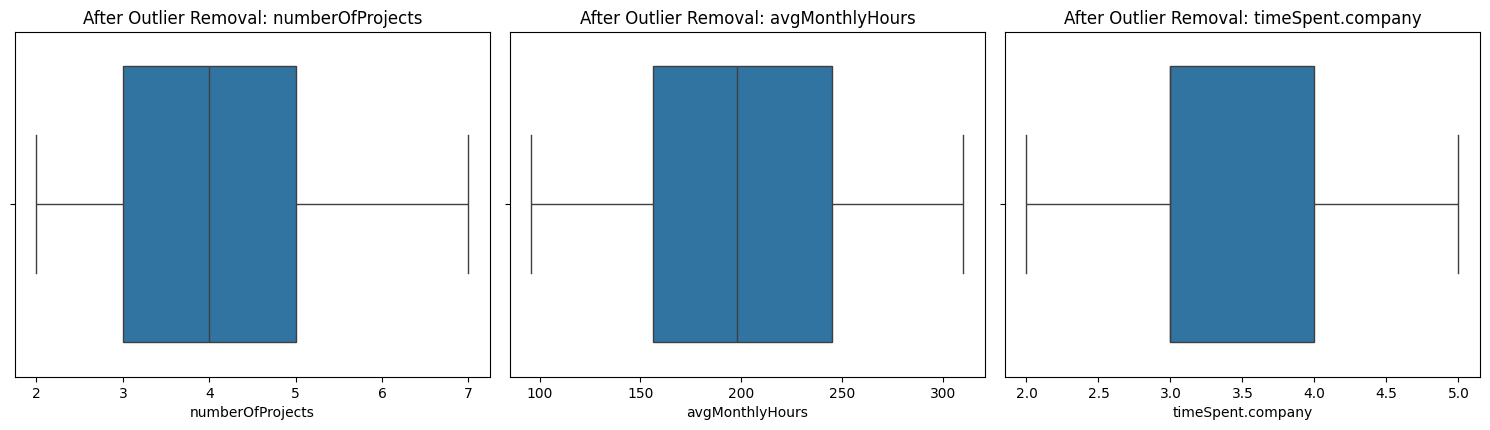

In [7]:
plt.figure(figsize=(15, 8))
for i, col in enumerate(new_num_columns):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x=data[col])
    plt.title(f"After Outlier Removal: {col}")
plt.tight_layout()
plt.show()

In [8]:
print(data.info())
data.describe().T

<class 'pandas.core.frame.DataFrame'>
Index: 13717 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfactoryLevel      13717 non-null  float64
 1   lastEvaluation         13717 non-null  float64
 2   numberOfProjects       13717 non-null  int64  
 3   avgMonthlyHours        13717 non-null  int64  
 4   timeSpent.company      13717 non-null  int64  
 5   workAccident           13717 non-null  int64  
 6   left                   13717 non-null  int64  
 7   promotionInLast5years  13717 non-null  int64  
 8   dept                   13717 non-null  object 
 9   salary                 13717 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.2+ MB
None


,count,mean,std,min,25%,50%,75%,max
satisfactoryLevel,13717.0,0.611729,0.248126,0.09,0.44,0.64,0.81,1.0
lastEvaluation,13717.0,0.714338,0.170571,0.36,0.56,0.72,0.87,1.0
numberOfProjects,13717.0,3.783116,1.243583,2.00,3.00,4.00,5.00,7.0
avgMonthlyHours,13717.0,200.592768,49.915380,96.00,156.00,198.00,245.00,310.0
timeSpent.company,13717.0,3.164686,0.908507,2.00,3.00,3.00,4.00,5.0
workAccident,13717.0,0.141576,0.348628,0.00,0.00,0.00,0.00,1.0
left,13717.0,0.245097,0.430161,0.00,0.00,0.00,0.00,1.0
promotionInLast5years,13717.0,0.017497,0.131117,0.00,0.00,0.00,0.00,1.0


After Outlier removal we are left with 13717 rows i.e there are 13717 employee datasets

# EDA

In [9]:
total_employees = data.shape[0]
current_workforce_size = data[data['left'] == 0].shape[0]
employees_left = data[data['left'] == 1].shape[0]

print(f"Total Employees: {total_employees}")
print(f"Current Workforce Size: {current_workforce_size}")
print(f"Employees Left the Company: {employees_left}")

Total Employees: 13717
Current Workforce Size: 10355
Employees Left the Company: 3362


Total no. of Employees in the company were : 13717  

No. of Employees that left the company recently : 3362

Current Workforce Size : 10355

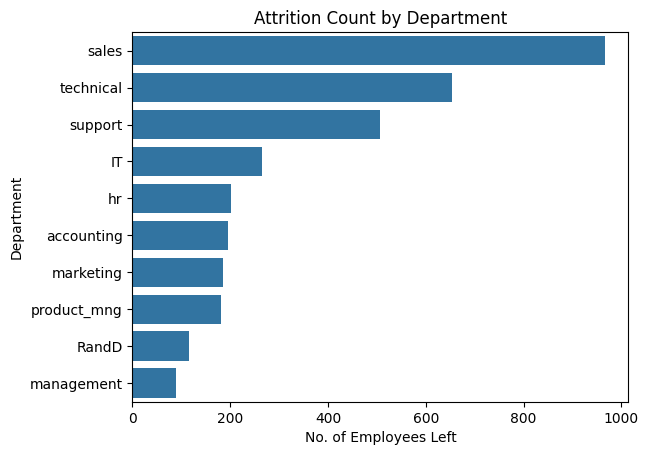

In [10]:
dept_attr = data[data['left'] == 1]['dept'].value_counts()
sns.barplot(x=dept_attr.values, y=dept_attr.index)
plt.title('Attrition Count by Department')
plt.xlabel('No. of Employees Left')
plt.ylabel('Department')
plt.show()

Sales, Technical and Support department tops in experiencing the highest no. of attrition

C:\Users\netus\AppData\Local\Temp\ipykernel_13832\2976899029.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=attrition_rate_by_dept.values, y=attrition_rate_by_dept.index, palette="RdYlGn")


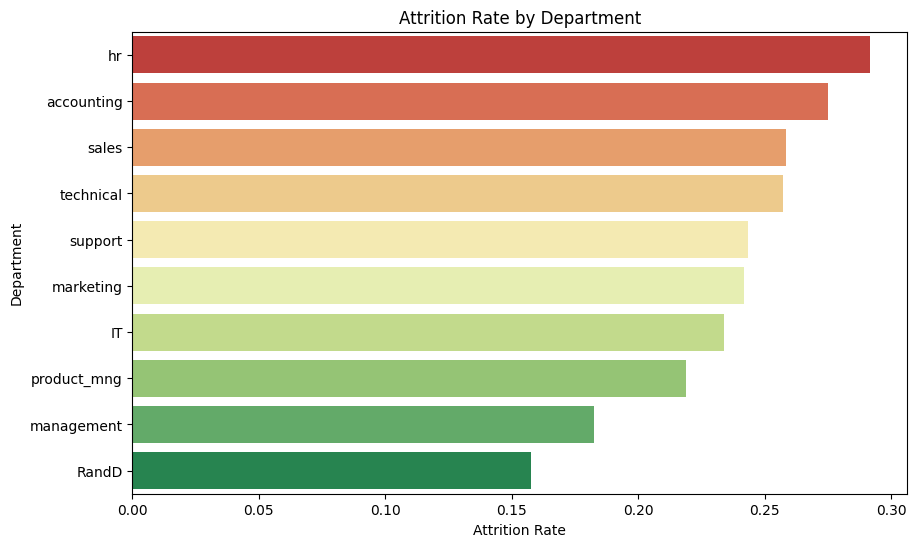

In [11]:
# Calculates attrition rate by department
attrition_rate_by_dept = data.groupby('dept')['left'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=attrition_rate_by_dept.values, y=attrition_rate_by_dept.index, palette="RdYlGn")
plt.title('Attrition Rate by Department')
plt.xlabel('Attrition Rate')
plt.ylabel('Department')
plt.show()


While HR, Accounting and Sales Department tops in Attrition Rate i.e Percent of employees left in a particular department

C:\Users\netus\AppData\Local\Temp\ipykernel_13832\2056925163.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Project Group', y='Attrition Rate', data=attrition_rates, palette="coolwarm")


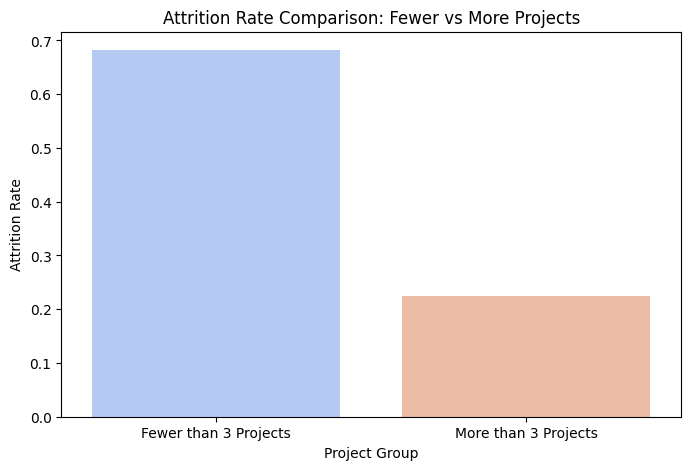

In [12]:
# Calculates attrition rate for employees working on fewer than 3 projects
fewer_projects = data[data['numberOfProjects'] < 3]
attrition_rate_fewer_projects = fewer_projects[fewer_projects['left'] == 1].shape[0] / fewer_projects.shape[0]

# Calculates attrition rate for employees working on more than 3 projects
more_projects = data[data['numberOfProjects'] > 3]
attrition_rate_more_projects = more_projects[more_projects['left'] == 1].shape[0] / more_projects.shape[0]


attrition_rates = pd.DataFrame({
    'Project Group': ['Fewer than 3 Projects', 'More than 3 Projects'],
    'Attrition Rate': [attrition_rate_fewer_projects, attrition_rate_more_projects]
})

# Visualizes the attrition rates using a bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x='Project Group', y='Attrition Rate', data=attrition_rates, palette="coolwarm")
plt.title('Attrition Rate Comparison: Fewer vs More Projects')
plt.ylabel('Attrition Rate')
plt.xlabel('Project Group')
plt.show()

As seen in the graph above those Employees which are working on less than 3 projects are more likely to leave the company as compared to those who work on more than 3 projects

Like 70% approx of the employees which were working on less than 3 projects had left the company.

The Company should assign more projects to their employees.

In [13]:
# Filters data for employees who have left
left_employees = data[data['left'] == 1]

# Calculates correlation between numberOfProjects and timeSpent.company
correlation = left_employees['numberOfProjects'].corr(left_employees['timeSpent.company'])

print(f"Correlation between number of projects and time spent at the company for employees who have left: {correlation:.2f}")

Correlation between number of projects and time spent at the company for employees who have left: 0.66


It says that that Number of projects is 66 % correlated with time spent in the company by the employees that had left.

C:\Users\netus\AppData\Local\Temp\ipykernel_13832\2202394649.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=attrition_rate_by_salary.index, y=attrition_rate_by_salary.values, palette="coolwarm")


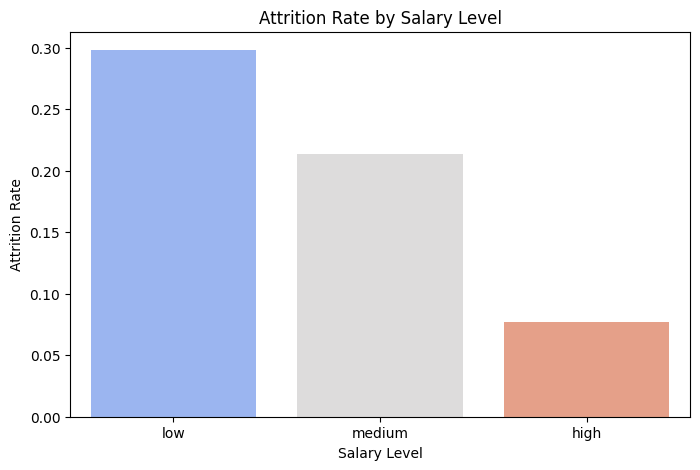

In [14]:
# Calculates attrition rate by salary level
attrition_rate_by_salary = data.groupby('salary')['left'].mean().sort_values(ascending=False)

# Visualizes the attrition rate by salary level
plt.figure(figsize=(8, 5))
sns.barplot(x=attrition_rate_by_salary.index, y=attrition_rate_by_salary.values, palette="coolwarm")
plt.title('Attrition Rate by Salary Level')
plt.xlabel('Salary Level')
plt.ylabel('Attrition Rate')
plt.show()

Employees with less salary accounts for the highest attrition rate followed by medium and high

Which concludes that Compensation levels are also influencing an employees decision to leave the company.

The Company should pay their employees reasonably

C:\Users\netus\AppData\Local\Temp\ipykernel_13832\1380998935.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Promotion Status', y='Attrition Rate', data=promotion_attrition_rates, palette="coolwarm")


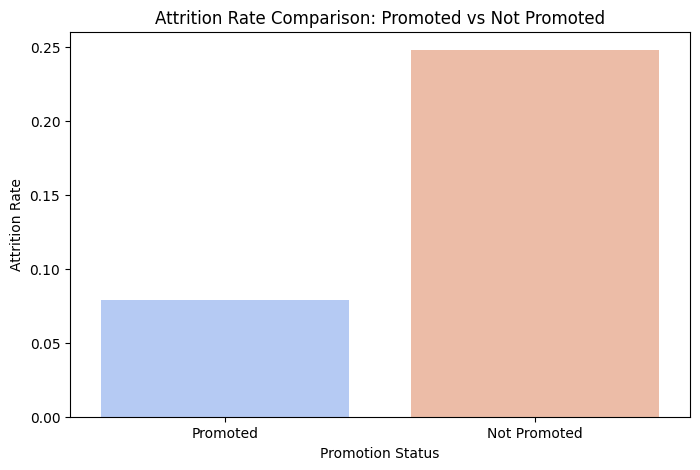

In [15]:
# Calculates attrition rate for promoted employees
promoted_employees = data[data['promotionInLast5years'] == 1]
attrition_rate_promoted = promoted_employees[promoted_employees['left'] == 1].shape[0] / promoted_employees.shape[0]

# Calculates attrition rate for non-promoted employees
non_promoted_employees = data[data['promotionInLast5years'] == 0]
attrition_rate_non_promoted = non_promoted_employees[non_promoted_employees['left'] == 1].shape[0] / non_promoted_employees.shape[0]

# Visualizes the attrition rates using a bar plot
promotion_attrition_rates = pd.DataFrame({
    'Promotion Status': ['Promoted', 'Not Promoted'],
    'Attrition Rate': [attrition_rate_promoted, attrition_rate_non_promoted]
})

plt.figure(figsize=(8, 5))
sns.barplot(x='Promotion Status', y='Attrition Rate', data=promotion_attrition_rates, palette="coolwarm")
plt.title('Attrition Rate Comparison: Promoted vs Not Promoted')
plt.ylabel('Attrition Rate')
plt.xlabel('Promotion Status')
plt.show()

The employees which were not promoted in the Last 5 years accounts for the higher attrition rate.


So, The Company should promote their employees timely to ensure a healthy hierarchy and to motivate them.